In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 加载的图片的大小
IMG_SIZE = 64

# 批量大小
BATCH_SIZE = 64

# 可利用的GPU数量，使用0将运行在CPU模式。
ngpu = 1

# 训练次数
num_epochs = 1000

# 训练图片的通道数，彩色图片是3
nc = 3

# 本征向量z的大小(生成器的输入大小)
nz = 100

# 生成器中特征图大小
ngf = 64

# 判别器中特征图大小
ndf = 64

# 优化器学习率
lr = 0.0002

# Adam优化器的Beta1超参
beta1 = 0.5

In [3]:
# 生成器代码

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # 输入是 Z, 对Z进行卷积
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # 输入特征图大小. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # 输入特征图大小. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # 输入特征图大小. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # 输入特征图大小. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # 输入特征图大小. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [4]:
generator = Generator(ngpu)
print(generator)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [18]:
generator.load_state_dict(torch.load('G_params_1500_100.pkl'))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


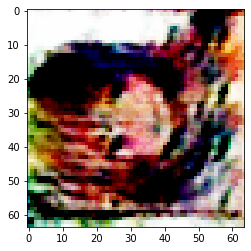

In [19]:
test = generator(torch.randn((1, nz,1,1)))
plt.imshow(np.transpose(test[0].detach().numpy()))

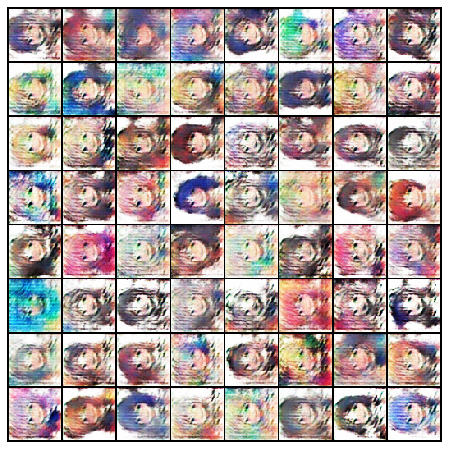

In [20]:
import torchvision.utils as vutils


plt.figure(figsize=(8,8))
plt.axis("off")
images = generator(torch.randn((64, nz,1,1)))
plt.imshow(np.transpose(
    vutils.make_grid(images, padding=2, normalize=True).detach().numpy()
))